In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

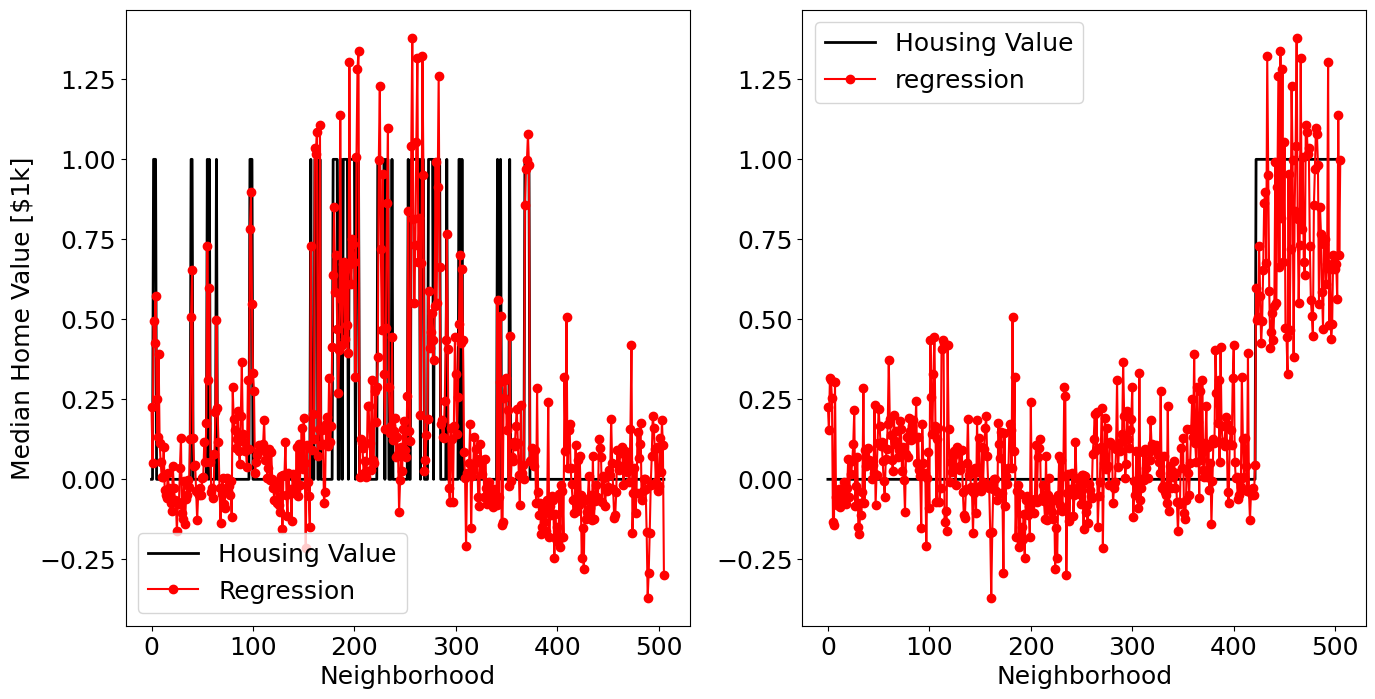

In [2]:
H = np.loadtxt('Housing.csv', delimiter=',')
b = H[:, -1]
A = H[:, :-1]

#Pad with ones for nonzero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value')
plt.plot(A@x, '-o', color='r', linewidth= 1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:, -1])
b = b[sort_ind]
plt.plot(b, color='k', linewidth=2, label='Housing Value',)
plt.plot(A[sort_ind, :] @ x, '-o', color='r', linewidth=1.5, markersize=6, label='regression')

plt.xlabel('Neighborhood')
plt.legend()
plt.show()


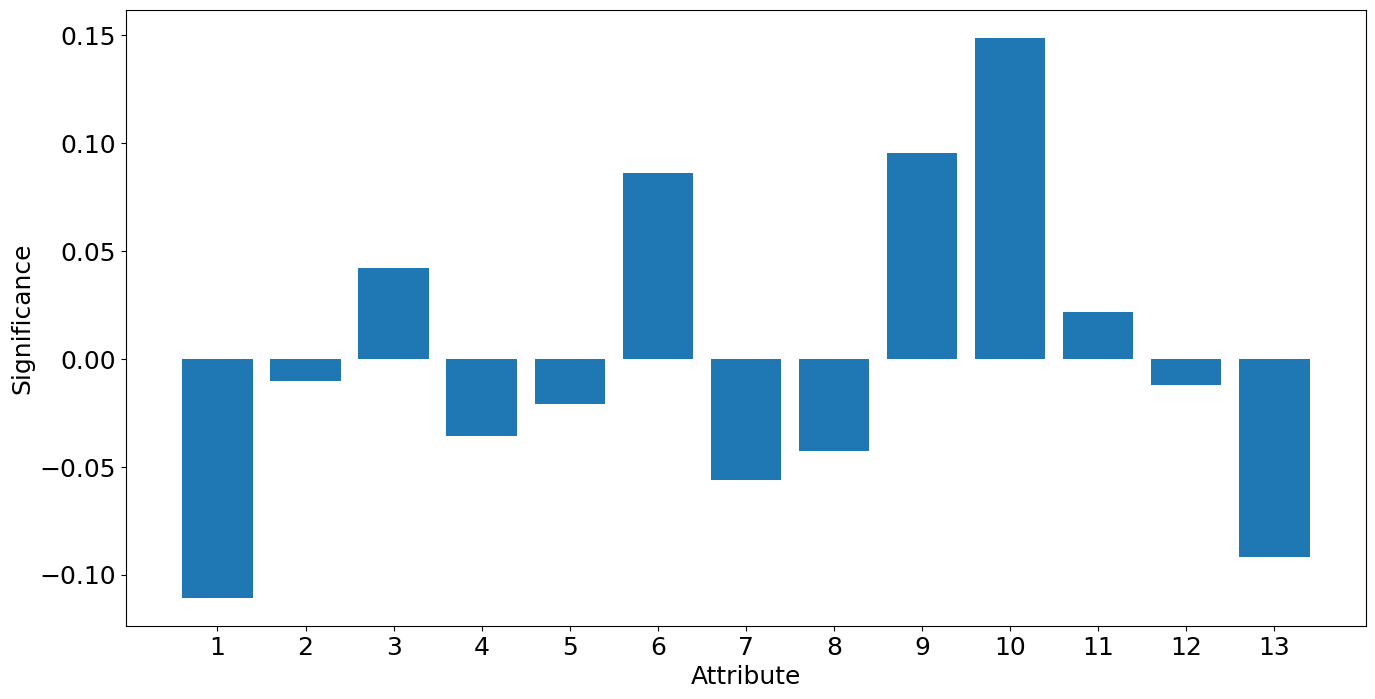

In [3]:
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:, j])
    A2[:, j] = A2[:,j]/A2std

A2[:, -1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x) -1) + np.ones(len(x) -1)
plt.bar(x_tick, x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

Training and testing the model 

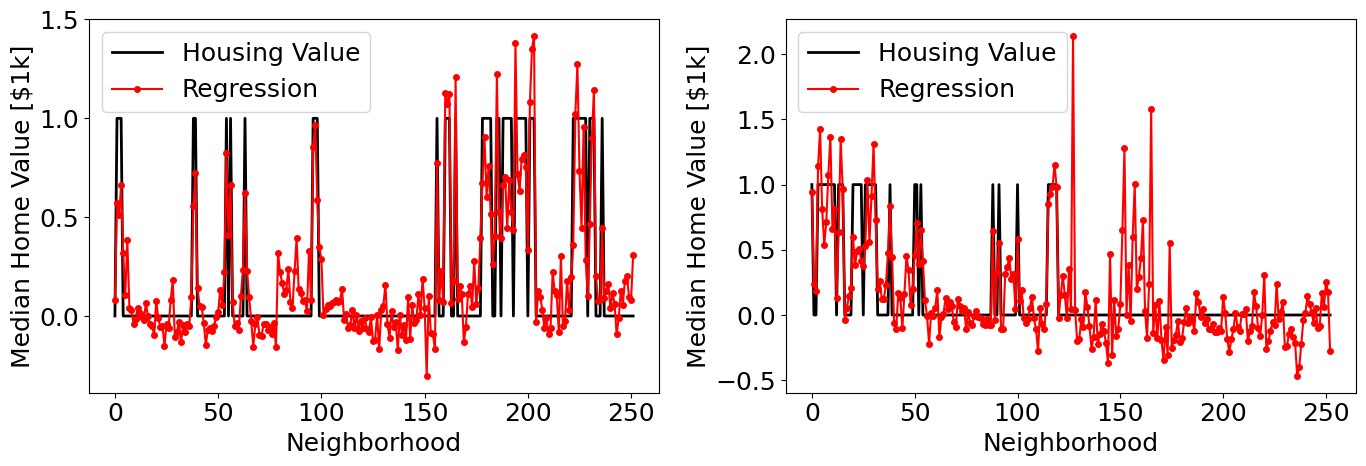

In [4]:
H = np.loadtxt('housing.csv', delimiter=',')
b = H[:, -1]
A = H[:, :-1]

#Pad with ones for nonzero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

n = 253
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure(figsize=(14, 5))

# First subplot - Training data
ax1 = fig.add_subplot(121)
plt.plot(btrain, color='k', linewidth=2, label='Housing Value')
plt.plot(Atrain@x, '-o', color='r', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

# Second subplot - Test data
ax2 = fig.add_subplot(122)
plt.plot(btest, color='k', linewidth=2, label='Housing Value')
plt.plot(Atest@x, '-o', color='r', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

plt.tight_layout()
plt.show()

Randomly shuffling the training matracies

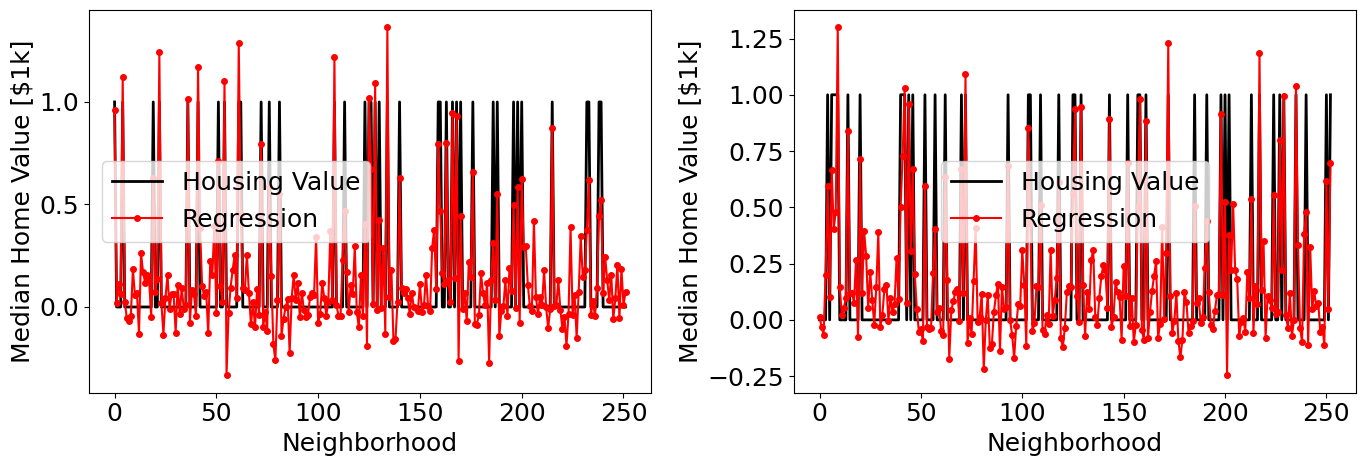

In [5]:
H = np.loadtxt('housing.csv', delimiter=',')
b = H[:, -1]
A = H[:, :-1]

#Pad with ones for nonzero offset
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values=1)

n = 253
p = np.random.permutation(506)
A = A[p, :]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure(figsize=(14, 5))

# First subplot - Training data
ax1 = fig.add_subplot(121)
plt.plot(btrain, color='k', linewidth=2, label='Housing Value')
plt.plot(Atrain@x, '-o', color='r', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

# Second subplot - Test data
ax2 = fig.add_subplot(122)
plt.plot(btest, color='k', linewidth=2, label='Housing Value')
plt.plot(Atest@x, '-o', color='r', linewidth=1.5, markersize=4, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

plt.tight_layout()
plt.show()